In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from PIL import Image
import math
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from textwrap import wrap


from utils import KunischMetrics
from utils import KunischPruner
from utils import DataExplorer
from utils import KunischPlotter

In [11]:
files_dir = os.path.join('..', 'outputs', 'txt_files')
target = 'f1-beta'
target_name = 'F2-Score'

df_patterns = pd.read_csv(os.path.join(files_dir, 'resultados_C2AE_images.csv'), index_col=0)
df_alexnet = pd.read_csv(os.path.join(files_dir, 'resultados_C2AE_alexnet.csv'), index_col=0)

# scores nuevos calculados
beta = 2**2
for df in [df_patterns, df_alexnet]:
    df['f1-beta'] = (1 + beta) * (df['precision']*df['recall'])/((beta*df['precision']) + df['recall'])
    
scores_patterns = df_patterns[target]
scores_alexnet = df_alexnet[target]
techniques = scores_patterns.index.values

In [12]:
plt.rcParams.update({'font.size': 11})
plt.rcParams['figure.dpi'] = 1000

In [13]:
display(scores_patterns)

data_flags
base                                         0.306379
blur                                         0.306379
crop1                                        0.306379
elastic1                                     0.306379
gausblur1                                    0.306379
mtnblur                                      0.306379
rain                                         0.306379
rain_ref_rot                                 0.306379
randaug1                                     0.306379
ref                                          0.306379
blur_rain_ref_rot_crop1_elastic1             0.210306
blur_rain_ref_rot_crop1_randaug1_elastic1    0.167839
ref_rot                                      0.229688
rot                                          0.153996
blur_rain_ref_rot_elastic1                   0.090829
rain_ref_rot_elastic1                        0.149302
Name: f1-beta, dtype: float64

blur_rain_ref_rot_elastic1 0.09082894736842105 0.15581089817594088
rain_ref_rot_elastic1 0.14930207547169808 0.14035333222536148
rot 0.15399637319793275 0.16032934131736531
blur_rain_ref_rot_crop1_randaug1_elastic1 0.16783867771572689 0.20398331852729248
blur_rain_ref_rot_crop1_elastic1 0.21030593854194826 0.20820650187554104
ref_rot 0.22968753825437627 0.16635502210991787
ref 0.30637907689492705 0.23248235453805083
randaug1 0.30637907689492705 0.25889888417102797
rain_ref_rot 0.30637907689492705 0.2806950862026134
mtnblur 0.30637907689492705 0.28196289111704537
rain 0.30637907689492705 0.2840434316876035
gausblur1 0.30637907689492705 0.2878199652945146
elastic1 0.30637907689492705 0.2970403434128551
crop1 0.30637907689492705 0.29803943989534376
blur 0.30637907689492705 0.31120223152022314
base 0.30637907689492705 0.34633153371529307


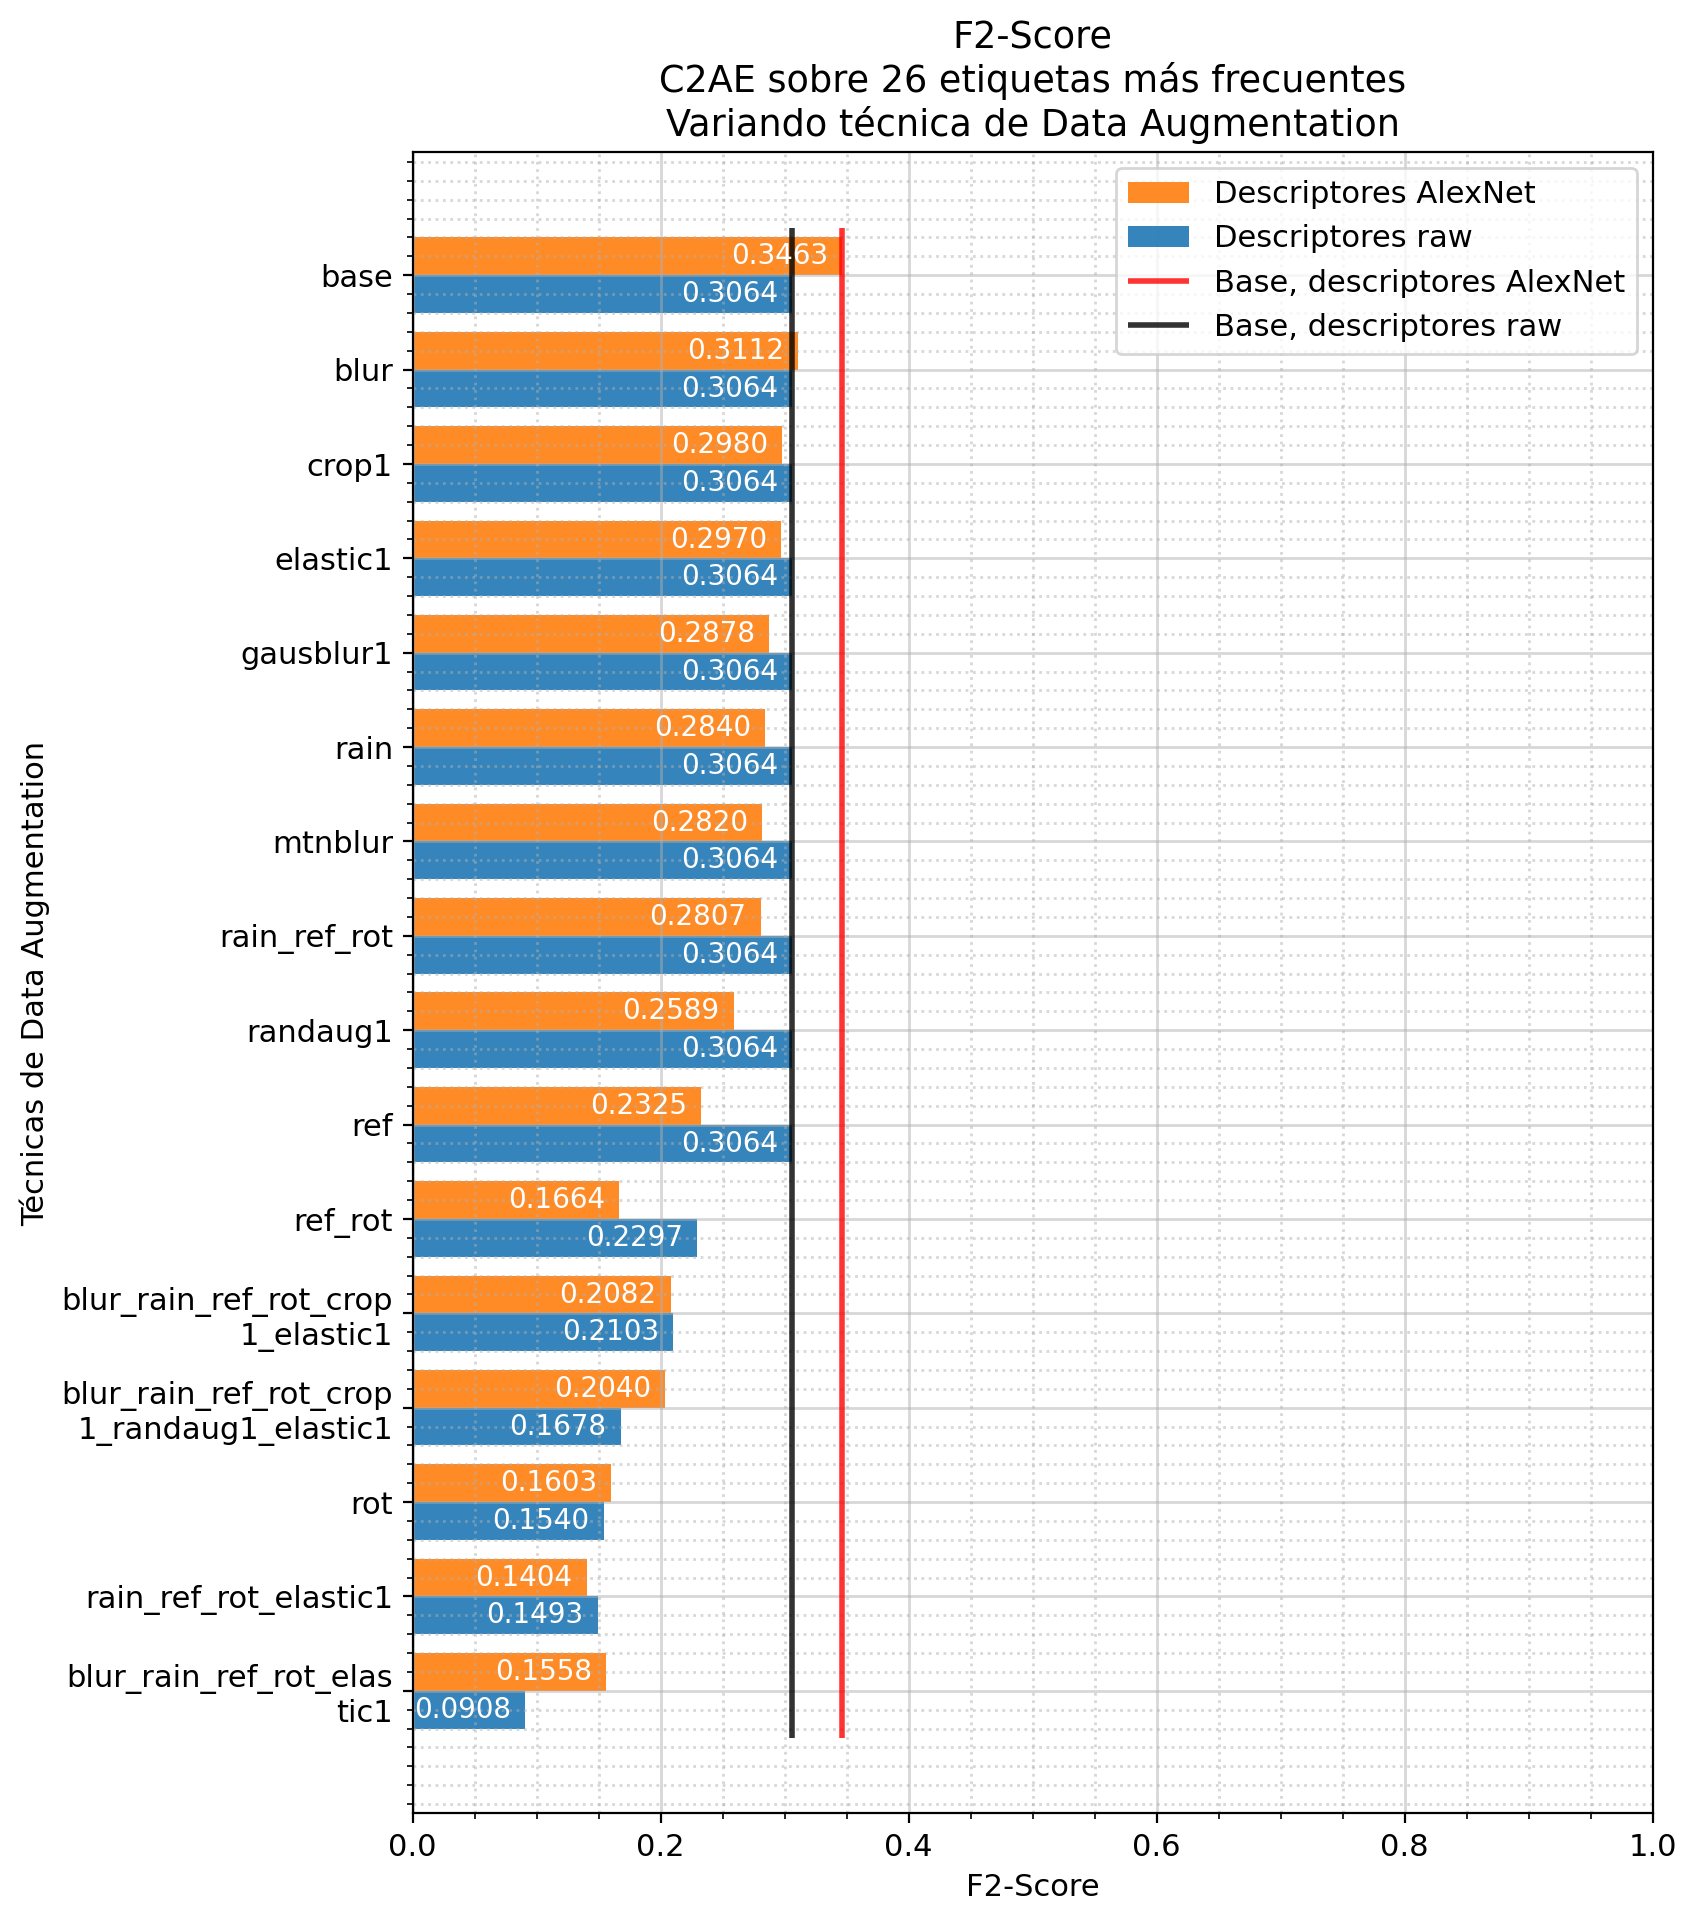

In [14]:
# ordenar 
s_pw, s_no_pw, techsorted = zip(*sorted(zip(scores_patterns, scores_alexnet, techniques)))

for i in range(0, len(techniques)):
    print(techsorted[i], s_pw[i], s_no_pw[i])
    
# wrap de las etiquetas cuando exceden cierto largo
techsorted = ['\n'.join(wrap(l, 22)) for l in techsorted]
x = np.arange(len(techsorted))

fig, ax = plt.subplots()
width = 0.4

b1 = ax.barh(x - width/2, s_pw, width, label = 'Descriptores raw', color='tab:blue', alpha=0.9)
b2 = ax.barh(x + width/2, s_no_pw, width, label = 'Descriptores AlexNet', color='tab:orange', alpha=0.9)
order = [3, 2, 0, 1]


ax.set_xlabel(target_name)
ax.set_ylabel('Técnicas de Data Augmentation')

ax.set_title(target_name + '\nC2AE sobre 26 etiquetas más frecuentes\nVariando técnica de Data Augmentation')

# linea horizontal marcando el resultado base no pw
index_base = techsorted.index('base')
plt.vlines(x=s_no_pw[index_base], color='red', linewidth=2, 
           ymin=-0.5, ymax=15.5, label = 'Base, descriptores AlexNet',
           alpha=0.8)
plt.vlines(x=s_pw[index_base], color='black', linewidth=2,
           ymin=-0.5, ymax=15.5, label = 'Base, descriptores raw',
           alpha=0.8)

# rotar labels del eje x
#plt.xticks(rotation=90)
fig.set_size_inches(8, 11)
fig.set_dpi(200)

ax.grid(which='both')
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='1', alpha=0.5)
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='1', alpha=0.5)

            
# legends en orden deseado
handles, ls = plt.gca().get_legend_handles_labels()
ax.legend([handles[idx] for idx in order],[ls[idx] for idx in order])
ax.bar_label(b1, fmt= '%.4f', padding=-40, color='white', size=10)
ax.bar_label(b2, fmt= '%.4f', padding=-40, color='white', size=10)
    
ax.set_yticks(x, techsorted)

ax.set_xlim(0, 1)
plt.show()

